In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x=df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [28]:
from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=5 , random_state=1)
ylabel=kmeans.fit_predict(x)

In [29]:
ylabel

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [30]:
kmeans.inertia_

44448.45544793371

In [31]:
#printing centroids

In [32]:
centroids=kmeans.cluster_centers_

In [33]:
centroids

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [34]:
#visualizing centroids on data

In [35]:
centroid_df = pd.DataFrame(centroids,columns=["X","Y"])

In [36]:
centroid_df

,X,Y
0,25.727273,79.363636
1,88.200000,17.114286
2,55.296296,49.518519
3,86.538462,82.128205
4,26.304348,20.913043


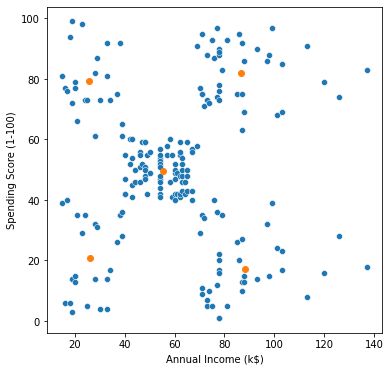

In [37]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"])
plt.scatter(centroid_df["X"],centroid_df["Y"])
plt.show()

# K values and Elbow method

In [38]:
wcss=[]
for i in range(1,30):
    km2=KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300,random_state=1)
    km2.fit(x)
    wcss.append(km2.inertia_)

In [39]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37233.81451071001,
 30566.45113025186,
 25005.550372432834,
 21996.523372372307,
 19746.911957660894,
 17602.19046838677,
 15926.627039985106,
 14631.802353268313,
 12793.951692914929,
 12002.023047743329,
 11151.50775058275,
 10264.837447764541,
 9490.19002831011,
 8880.551059466849,
 8121.500731780168,
 7667.180982236156,
 7385.859950013754,
 7018.027058579535,
 6517.28038699806,
 6232.733574758575,
 5756.705148119854,
 5413.182221401787,
 5208.137817737817,
 4989.701612276613]

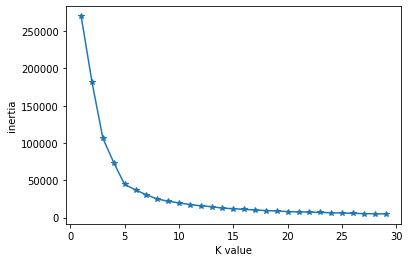

In [40]:
plt.plot(range(1,30),wcss,marker="*")
plt.xlabel("K value")
plt.ylabel("inertia")
plt.show()

# creating final clusters.from above oservation the best value of K is 5


In [41]:
ke3 = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300,random_state=1)

In [42]:
labels = ke3.fit_predict(x) 
ke3.inertia_

44448.45544793371

In [43]:
centroids = ke3.cluster_centers_
centroids

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [44]:
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [45]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [46]:
#combinig cluster number with df.
df_new = pd.concat([df, pd.DataFrame({'labels':labels})], axis=1) 
df_new.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


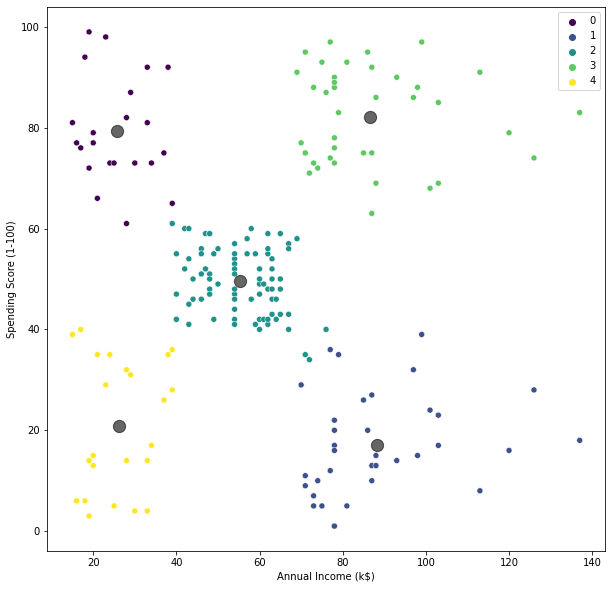

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"],hue=labels,palette="viridis")
plt.scatter(centroid_df["X"],centroid_df["Y"], c='black',s=150, alpha=0.6);
plt.show()